In [71]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import os.path

In [98]:
def is_float(string):
    try:
        return float(string) and '.' in string  # True if string is a number contains a dot
    except ValueError:  # String is not a number
        return False


def read_file():
    i = 0
    flag = 1
    T_ref = np.array([])
    Target_ref = np.array([])
    with open(r"C:\nisi_serg\info\heptane_data\substance_specific_heat_C7H16.dat") as f:
        for str_i in f:
            if float(str_i.split()[0]) > 390:
                T_ref = np.append(T_ref, [float(str_i.split()[0])])
                Target_ref = np.append(Target_ref, [float(str_i.split()[-1])])
    return T_ref, Target_ref

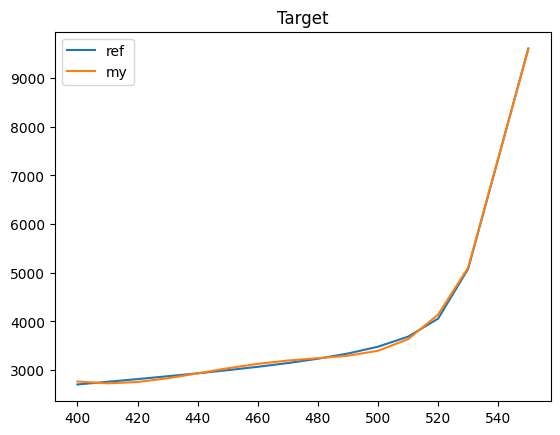

19543.959181961858 * pow(T, 0) + -6.606755939093141e-23 * pow(T, 1) + -2.355371844130393e-16 * pow(T, 2) + -1.5642442723232448e-17 * pow(T, 3) + -4.9518846113164506e-15 * pow(T, 4) + -1.1735702794856037e-12 * pow(T, 5) + -1.672825828412035e-10 * pow(T, 6) + 9.427158458314777e-13 * pow(T, 7) + -1.802581647596111e-15 * pow(T, 8) + 1.1643115996795725e-18 * pow(T, 9)


In [103]:
T_ref = np.array([])
Target_ref = np.array([])
T_ref, Target_ref = read_file()

T_ref_ln = np.log(T_ref)
Target_ref_ln = np.log(Target_ref)
degree = 9
poly = PolynomialFeatures(degree=degree, include_bias=False)
poly_features = poly.fit_transform(T_ref.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, Target_ref)
Target_ref_predicted = poly_reg_model.predict(poly_features)
plt.title("Target")
plt.plot(T_ref, Target_ref, label = "ref")
plt.plot(T_ref,(Target_ref_predicted), label = "my")
plt.legend()
plt.plot()
plt.show()
s = ""
for i in range(degree + 1):
    if i == 0:
        s += f"{poly_reg_model.intercept_} * pow(T, {i})"
    else: 
        s += f"{poly_reg_model.coef_[i - 1]} * pow(T, {i})"
    if i != degree:
        s += " + "
print(s)

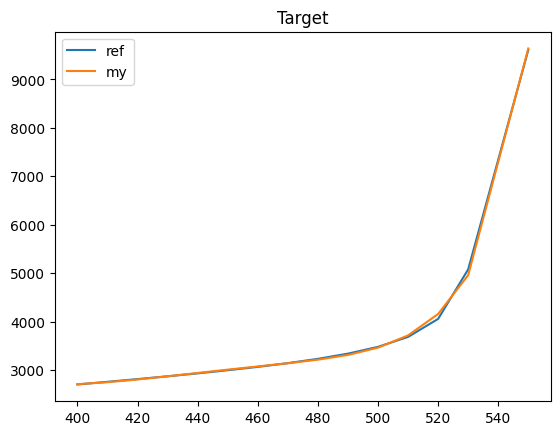

10.377599246830616 * pow(log_T, 0) + -1.2299748309469631e-21 * pow(log_T, 1) + 2.841800964016063e-17 * pow(log_T, 2) + -2.3398721323198984e-16 * pow(log_T, 3) + -5.900488651070622e-14 * pow(log_T, 4) + -8.740050129474305e-12 * pow(log_T, 5) + 4.9267013787544734e-14 * pow(log_T, 6) + -9.48192632588227e-17 * pow(log_T, 7) + 6.192156857573312e-20 * pow(log_T, 8)


In [102]:
T_ref = np.array([])
Target_ref = np.array([])
T_ref, Target_ref = read_file()
T_ref_ln = np.log(T_ref)
Target_ref_ln = np.log(Target_ref)

degree = 8
poly = PolynomialFeatures(degree=degree, include_bias=False)
poly_features = poly.fit_transform(T_ref.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, Target_ref_ln)
Target_ref_ln_predicted = poly_reg_model.predict(poly_features)
plt.title("Target")
plt.plot(T_ref, Target_ref, label = "ref")
plt.plot(T_ref, np.exp(Target_ref_ln_predicted), label = "my")
plt.legend()
plt.plot()
plt.show()
s = ""
for i in range(degree + 1):
    if i == 0:
        s += f"{poly_reg_model.intercept_} * pow(log_T, {i})"
    else:
        s += f"{poly_reg_model.coef_[i - 1]} * pow(log_T, {i})"
    if i != degree:
        s += " + "
print(s)